Solution to the practice question involving decision trees on iris dataset

In [62]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus 
import pandas as pd
from sklearn import datasets

In [63]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for simplicity
y = iris.target

In [64]:
# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# Split training data into testing and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [65]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.733333333333


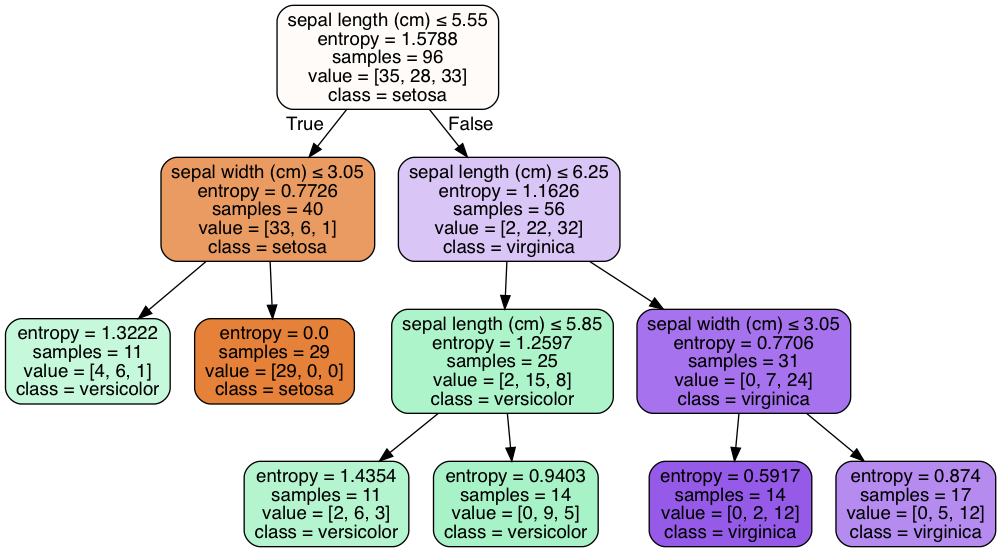

In [66]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [67]:
for leaf_size in [2,5,10,20]:
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=leaf_size)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print ('Validation accuracy for min_samples_leaf ' + str(leaf_size) + ' = ' + str(np.sum(y_pred == y_valid)*1.0/len(y_valid)))

Validation accuracy for min_samples_leaf 2 = 0.666666666667
Validation accuracy for min_samples_leaf 5 = 0.708333333333
Validation accuracy for min_samples_leaf 10 = 0.666666666667
Validation accuracy for min_samples_leaf 20 = 0.583333333333


In [68]:
X_train = np.concatenate((X_train, X_valid))
y_train = np.concatenate((y_train, y_valid))

clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.766666666667


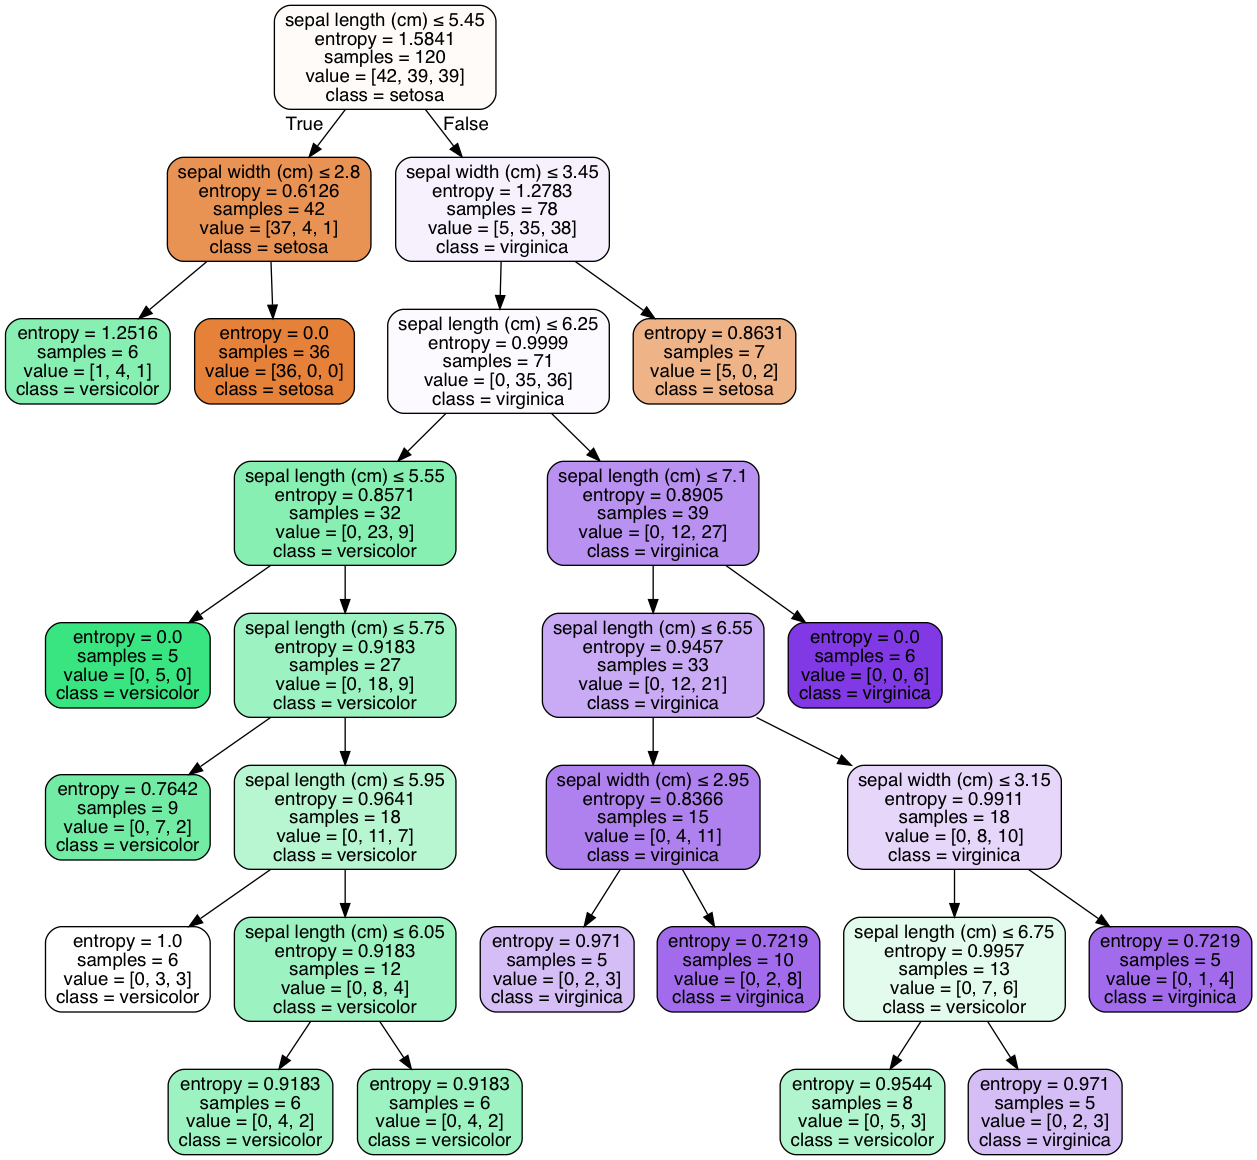

In [69]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 